<a href="https://colab.research.google.com/github/AnvithAnvi/Black-Friday-Sale-EDA/blob/main/BF_Sale_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Why this Project?

Want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products. 

# Which Domain my Dataset belongs to?

My Data-set belong to Business Domain. 

# Information about my Dataset?

Summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

#	What is my approach?

* Purchase column is the Target Variable, perform Univariate Analysis and 


* Bivariate Analysis w.r.t the Purchase.<br>
Masked in the column description means already converted from categorical value to numerical column.

*	DATA PREPROCESSING<br>
1) Perform EDA<br>
2) Rename columns <br>
3) Check for unique values in data<br>
4) Drop unnecessary fields<br>
5) Missing value treatment<br>
6) Fill nan values<br>
7) Convert categorical data into integer using map function.
*	Data Visualisation<br>
1) visualize individul column<br>
2) Age vs Purchased<br>
3) Occupation vs Purchased<br>
4) Productcategory1 vs Purchased<br>
5) Productcategory2 vs Purchased<br>
6) Productcategory3 vs Purchased


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data cleaning:**<br>
For data cleaning we are going to make use 2 Python libraries:-<br>
1) Numpy<br>
2) Pandas

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the csv file and visualizing the data

In [3]:
data=pd.read_csv('/content/drive/MyDrive/EDA Project INT353/Black Friday Sale.csv')
data.head(4)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### About Rows & Columns

In [5]:
data.shape

(550068, 12)

In [6]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

#### NAN values in 

In [7]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

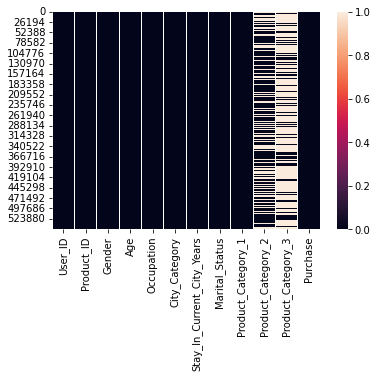

In [8]:
sns.heatmap(data.isnull())
plt.show()

Heatmap shows that null values are present in columns:<br>

1) Product_Category_2<br>
2) Product_Category_3


In [9]:
#Finding number of null values in dataset
data.isnull().sum().sum()

556885

### Duplicates in dataset

In [10]:
data.duplicated().sum()

0

> No duplicates in our dataset

**Renaming the columns**:- <br>
* Changing the names of the columns for better understanding.

In [11]:
data.rename(columns={'User_ID':'UserID',
                     'Product_ID':'ProductID',
                     'Product_Category_1':'product1',
                     'Product_Category_2':'product2',
                     'Product_Category_3':'product3',
                     'Marital_Status':'maritial',
                     'Stay_In_Current_City_Years':'city'},inplace=True)
data.head(3)

,UserID,ProductID,Gender,Age,Occupation,City_Category,city,maritial,product1,product2,product3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


**Droping out unnecessary columns:-**<br>
* Here we are going to drop product 3 coloumn as there are many null values so the visualization and cleaning becomes easy.

In [12]:
data.drop(['ProductID'],inplace=True,axis='columns')

In [13]:
data.head(3)

,UserID,Gender,Age,Occupation,City_Category,city,maritial,product1,product2,product3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422


***Cleaning individual columns :-***

1. Cleaning the city column








In [14]:
data['city'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [15]:
def cities(value):
    if '+' in value:
        value=value.replace('+','')
        return int(value)
    else:
        return int(value)

data['city']=data['city'].apply(cities)

In [16]:
data['city'].unique()

array([2, 4, 3, 1, 0])

In [17]:
data['city'].dtype

dtype('int64')

2. Cleaning UserID column

In [18]:
data['UserID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [19]:
data['UserID'].dtype

dtype('int64')

3. Cleaning Gender column

In [20]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [21]:
data.head()

,UserID,Gender,Age,Occupation,City_Category,city,maritial,product1,product2,product3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,C,4,0,8,NaN,NaN,7969


In [22]:
data['Gender'].dtype

dtype('O')

4. Cleaning Age column

In [23]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [24]:
def ages(value):
    if '0-17' in value:
        value=value.replace('0-17','child')
        return str(value)
    elif '26-35'in value:
        value=value.replace('26-35','adult')
        return str(value)
    elif '18-25'in value:
        value=value.replace('18-25','teenage')
        return str(value)
    elif '36-45'in value:
        value=value.replace('36-45','adult')
        return str(value)
    elif '46-50'in value:
        value=value.replace('46-50','adult')
        return str(value)
    elif '51-55'in value:
        value=value.replace('51-55','old')
        return str(value)
    else:
        value=value.replace('55+','old')
        return str(value)
data['Age']=data['Age'].apply(ages)

* Over here we have replaced the age groups according to the categories.<br>
* We have replaced numerical data into categorical data.<br>
* The types of categories are: child,adult,teenage and old.<br>
1) 0-17 -> child<br>
2) 18-25 -> teenage<br>
3) 26-35 -> adult<br>
4) 36-45 -> adult<br>
5) 46-50 -> adult<br>
6) 51-55 -> old<br>
7) 55+ -> old

In [25]:
data['Age'].unique()

array(['child', 'old', 'adult', 'teenage'], dtype=object)

In [26]:
data.head(6)

,UserID,Gender,Age,Occupation,City_Category,city,maritial,product1,product2,product3,Purchase
0,1000001,F,child,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,child,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,child,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,child,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,old,16,C,4,0,8,NaN,NaN,7969
5,1000003,M,adult,15,A,3,0,1,2.0,NaN,15227


5. Cleaning Occupation Column

In [27]:
data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [28]:
data['Occupation'].dtype

dtype('int64')

6. Cleaning City category column

In [29]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

7. Cleaning maritial column


In [30]:
data['maritial'].unique()

array([0, 1])

In [31]:
data['maritial'].dtype

dtype('int64')

* There's nothing to change in this column.<br>
1)  Here married status -> 1<br>
2)  Whereas single status -> 0

In [32]:
data[['UserID','maritial']].tail()

,UserID,maritial
550063,1006033,1
550064,1006035,0
550065,1006036,1
550066,1006038,0
550067,1006039,1


8. Cleaning product1 column

In [33]:
data['product1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         550068 non-null  int64  
 1   Gender         550068 non-null  object 
 2   Age            550068 non-null  object 
 3   Occupation     550068 non-null  int64  
 4   City_Category  550068 non-null  object 
 5   city           550068 non-null  int64  
 6   maritial       550068 non-null  int64  
 7   product1       550068 non-null  int64  
 8   product2       376430 non-null  float64
 9   product3       166821 non-null  float64
 10  Purchase       550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


9. Cleaning product2 column

In [35]:
data['product2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: product2, dtype: int64

> The percentage of null data in product2 column



In [36]:
(data['product2'].isnull().sum() / len(data)) * 100

31.56664266963357

> The mode of product 2

In [37]:
s=data.groupby('Age')['product2'].agg(pd.Series.mode)
s

Age
adult      8.0
child      4.0
old        8.0
teenage    8.0
Name: product2, dtype: float64

In [38]:
for key in s.index:
    data.loc[(data['Age']==key) & (data['product2'].isnull()), 'product2']=s[key]

In [39]:
data['product2'].isnull().sum()

0

> Now the null values are cleaned in product2 


10. Cleaning Product3 column

In [40]:
data['product3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: product3, dtype: int64

> The percentage of null values in product3 column


In [41]:
(data['product3'].isnull().sum() / len(data)) * 100

69.67265865311198

> The mode of product 3

In [42]:
p=data.groupby('Age')['product3'].agg(pd.Series.mode)
p

Age
adult      16.0
child      16.0
old        16.0
teenage    16.0
Name: product3, dtype: float64

In [43]:
for key in p.index:
    data.loc[(data['Age']==key) & (data['product3'].isnull()), 'product3']=p[key]


In [44]:
data['product3'].isnull().sum()

0

> Now the null values are cleaned in product3

**After cleaning checking the data :-**

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         550068 non-null  int64  
 1   Gender         550068 non-null  object 
 2   Age            550068 non-null  object 
 3   Occupation     550068 non-null  int64  
 4   City_Category  550068 non-null  object 
 5   city           550068 non-null  int64  
 6   maritial       550068 non-null  int64  
 7   product1       550068 non-null  int64  
 8   product2       550068 non-null  float64
 9   product3       550068 non-null  float64
 10  Purchase       550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


In [46]:
data.isnull().sum()

UserID           0
Gender           0
Age              0
Occupation       0
City_Category    0
city             0
maritial         0
product1         0
product2         0
product3         0
Purchase         0
dtype: int64

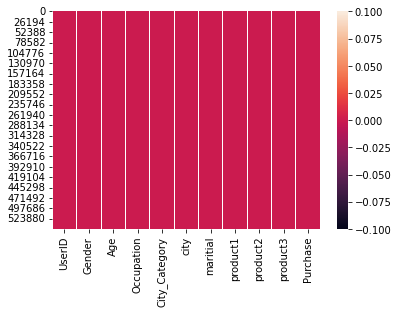

In [47]:
sns.heatmap(data.isnull())
plt.show()

The Heatmap shows that there is no null value present in dataset

## Data Visualization
* For data visualization we are going to use two python libraries <br>
1) Seaborn <br>
2) Matplotlib

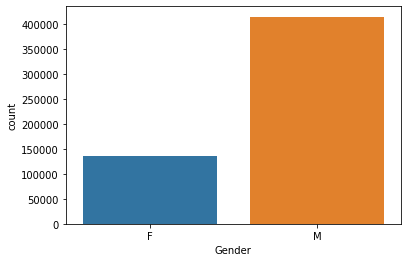

In [48]:
sns.countplot(x = data["Gender"])

> No. of males are greater than females

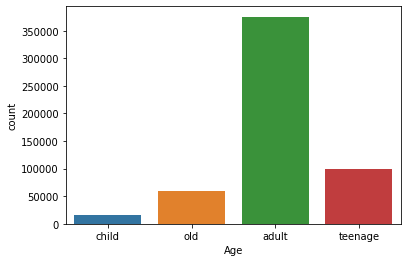

In [49]:
sns.countplot(x = data["Age"])

> Adults are more than anyother age group

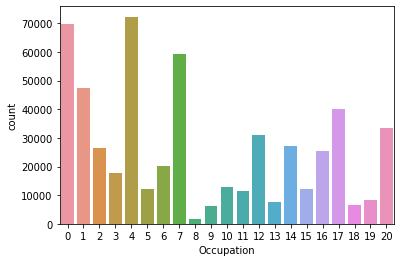

In [50]:
sns.countplot(x =data["Occupation"])

> People having 4 occupation are more than others

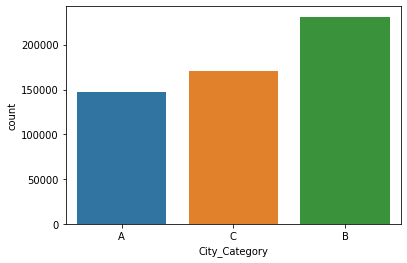

In [51]:
sns.countplot(x = data["City_Category"])

> People from city B are more than others

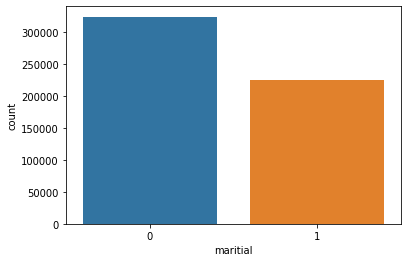

In [52]:
sns.countplot(x = data["maritial"])

> Unmarried peoples are more than married people

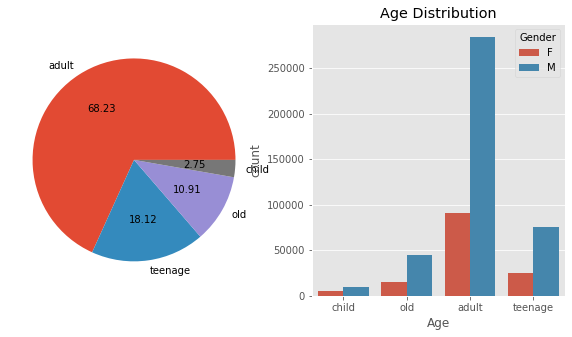

In [53]:
plt.figure(figsize = (10, 5))
plt.style.use('ggplot')


plt.subplot(1, 2, 1)
age = data.Age.value_counts().reset_index(name = 'count')
age.rename(mapper = {'index': 'Age'}, axis = 1, inplace = True)

plt.pie(x = age['count'], labels = age['Age'], autopct = '%.2f')

plt.subplot(1, 2, 2)
sns.countplot(x = 'Age', data = data, hue = 'Gender')

plt.title('Age Distribution', loc = 'center')
plt.show()

> Number of male adults are more than number of females adults and<br> Number of males are more than number of females

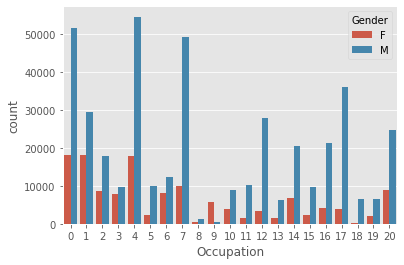

In [54]:
sns.countplot(x = 'Occupation', data = data, hue = 'Gender')

> Maximum number of Males and Females have Occupation 4 and Minimum number of Males and Females have Occupation 8

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


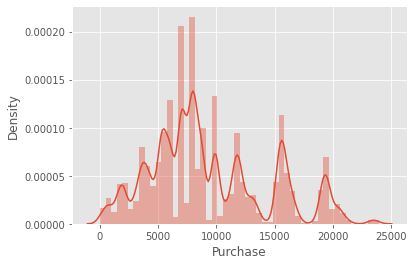

In [55]:
sns.distplot(data['Purchase']);

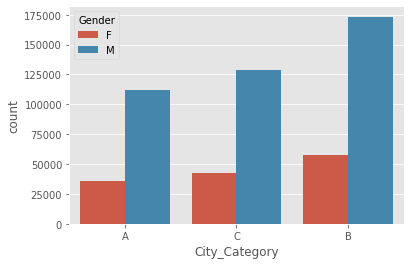

In [56]:
sns.countplot(x = 'City_Category', data = data, hue = 'Gender')

> Maximum number of Males and Females are in city B

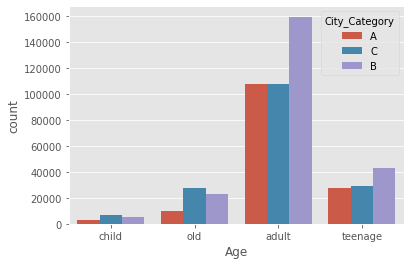

In [57]:
sns.countplot(x = 'Age', data = data,hue = 'City_Category')

> Adult people are maximum in All three cities

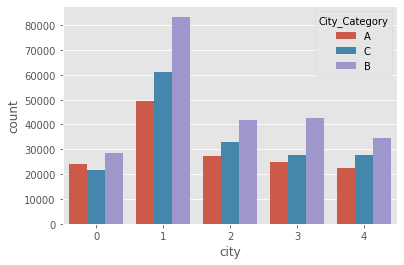

In [58]:
sns.countplot(x = 'city',data = data,hue='City_Category')

> In city B maximum people live for 1 year

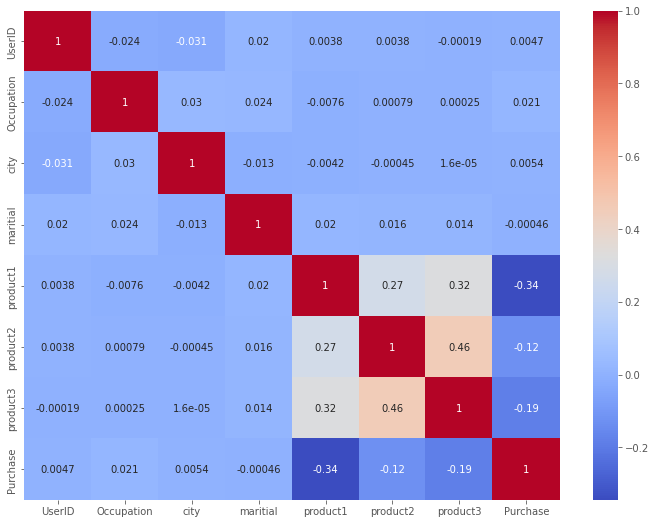

In [59]:
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

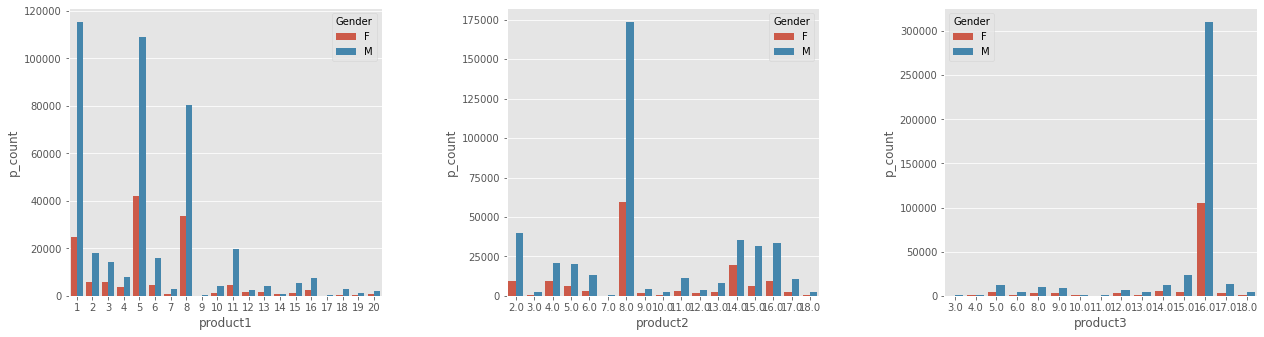

In [60]:
c1=data.groupby('Gender')['product1'].value_counts().to_frame().rename(columns={"product1":'p_count'}).reset_index()
c2=data.groupby('Gender')['product2'].value_counts().to_frame().rename(columns={"product2":'p_count'}).reset_index()
c3=data.groupby('Gender')['product3'].value_counts().to_frame().rename(columns={"product3":'p_count'}).reset_index()
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(1,3,1)
sns.barplot(x='product1',y='p_count',hue='Gender',data=c1)
plt.subplot(1,3,2)
sns.barplot(x='product2',y='p_count',hue='Gender',data=c2)
plt.subplot(1,3,3)
sns.barplot(x='product3',y='p_count',hue='Gender',data=c3)
plt.show()

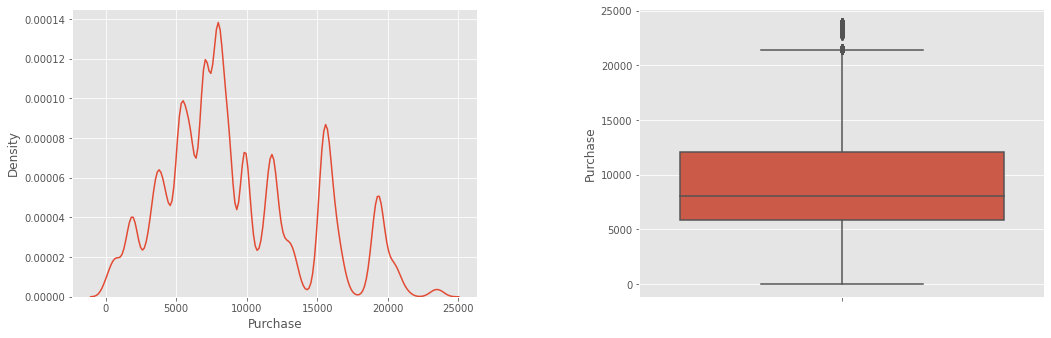

In [61]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(1,2,1)
sns.kdeplot('Purchase',data=data)
plt.subplot(1,2,2)
sns.boxplot(y='Purchase',data=data)
plt.show()

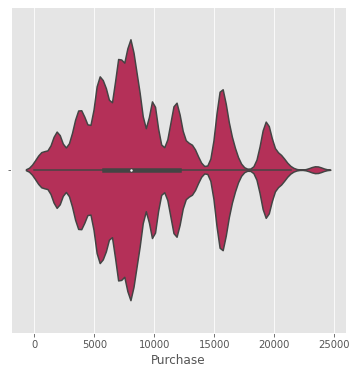

In [62]:
fig, axes = plt.subplots(nrows=1,ncols=1 ,figsize=(6,6))
sns.violinplot(x='Purchase',data=data,palette="rocket_r")

> The violin plot gives kernel density estimation of the underlying distribution. In this plot the curves shows that high purchase rate is between 5000 to 10000.

([<matplotlib.patches.Wedge at 0x7f795a0c6210>,
 [Text(0.7571637562990738, 0.7979367431990312, 'A'),
  Text(-1.0748768348532234, 0.23375155592191532, 'B'),
  Text(0.5703081122356921, -0.9406107893906818, 'C')])

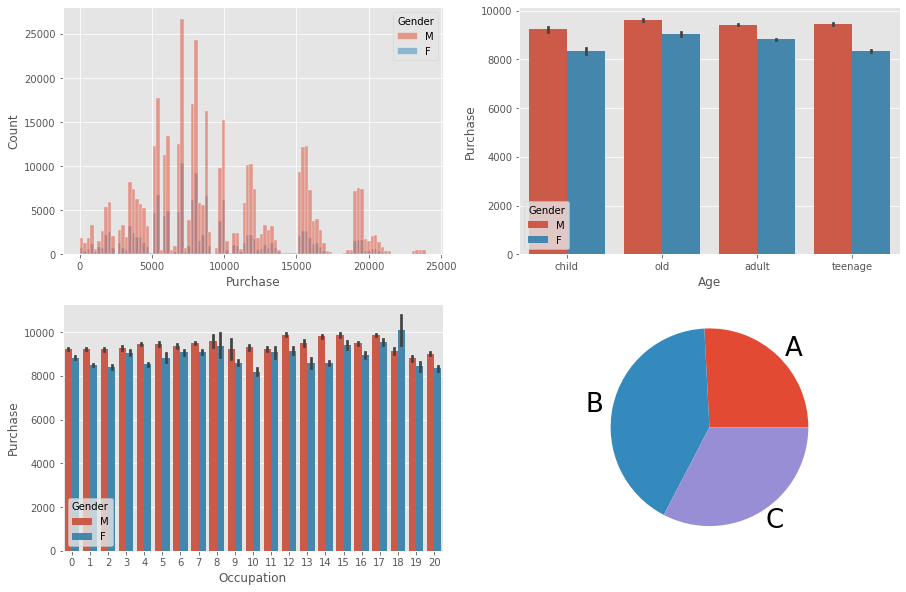

In [63]:
xcat=data.groupby("City_Category")["Purchase"].sum() 
fig ,ax =plt.subplots(2,2,figsize=(15,10))
sns.histplot(data=data ,x="Purchase", kde=False    , hue="Gender" , ax=ax[0][0] ,hue_order=["M","F"],bins=100,)
sns.barplot (data=data ,x="Age", y="Purchase" , hue='Gender' , ax=ax[0][1] ,hue_order=["M","F"])
sns.barplot (data=data ,x="Occupation" , y="Purchase" , hue='Gender' , ax=ax[1][0] ,hue_order=["M","F"])
plt.pie(x=xcat,labels=xcat.index,textprops={'fontsize': 26},)

AGE vs Purchase

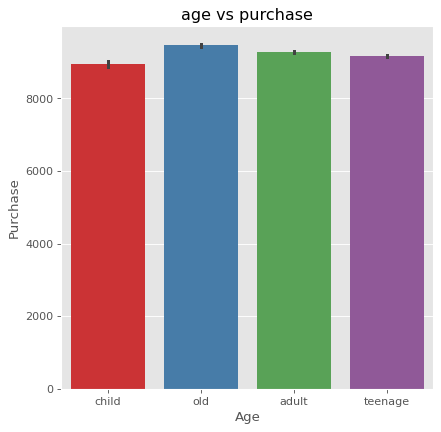

In [64]:
plt.figure(figsize=(6,6),dpi=80)
plt.title('age vs purchase')
sns.barplot(x='Age',y='Purchase',data=data,palette='Set1')

> Here we understood that the purchase rate of old age is highest and the lowest rate is of child.

Gender, Maritial, City vs Purchase

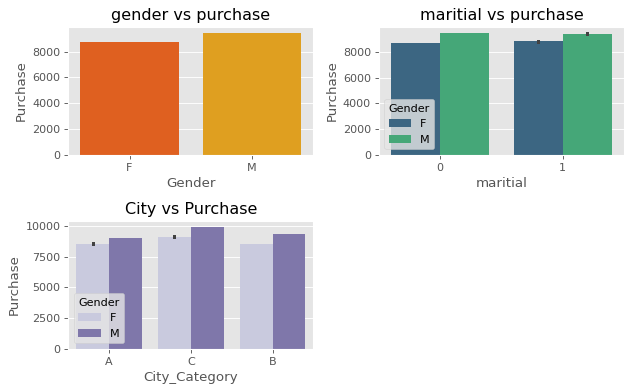

In [65]:
plt.figure(figsize=(8,5),dpi=80)
plt.subplot(2,2,1)
plt.title('gender vs purchase')
sns.barplot(x='Gender',y='Purchase',data=data,palette='autumn')

plt.subplot(2,2,2)
plt.title('maritial vs purchase')
sns.barplot(x='maritial',y='Purchase',hue='Gender',data=data,palette='viridis')

plt.subplot(2,2,3)
plt.title('City vs Purchase')
sns.barplot(data=data,x='City_Category',y='Purchase',hue='Gender',palette='Purples')

plt.tight_layout()
plt.show()


> Here we can see, we have three product_categories and on x-axis we having some values that are nothing but sub_products of that product_category in masked format.
> The graph showing that the sub_product count and the two colours bar are showing that the customer category count wich are buying that product.

> We observed that there are some sub_product's selling count is high and most of the 'Male' customers buying that product.

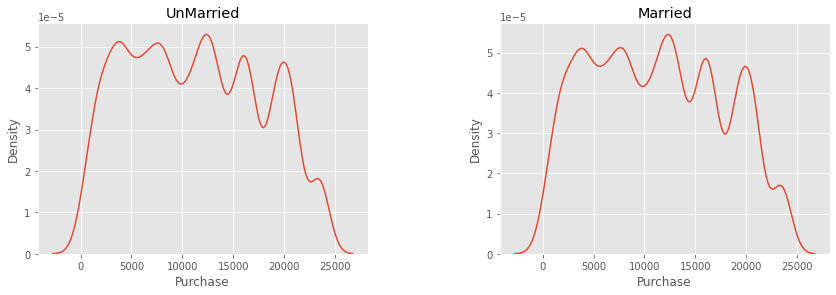

In [66]:
UM_P=data[data['maritial']==0].value_counts('Purchase').to_frame()
M_P=data[data['maritial']==1].value_counts('Purchase').to_frame()
plt.figure(figsize=(10,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(1,2,1)
sns.kdeplot('Purchase',data=UM_P).set_title('UnMarried')
plt.subplot(1,2,2)
sns.kdeplot('Purchase',data=M_P).set_title('Married')
plt.show()

> Purchase distribution both Married and Unmarried are quiet similar

,Gender,maritial,Purchase
0,F,0,684154127
1,F,1,502078515
2,M,0,2324773320
3,M,1,1584806780


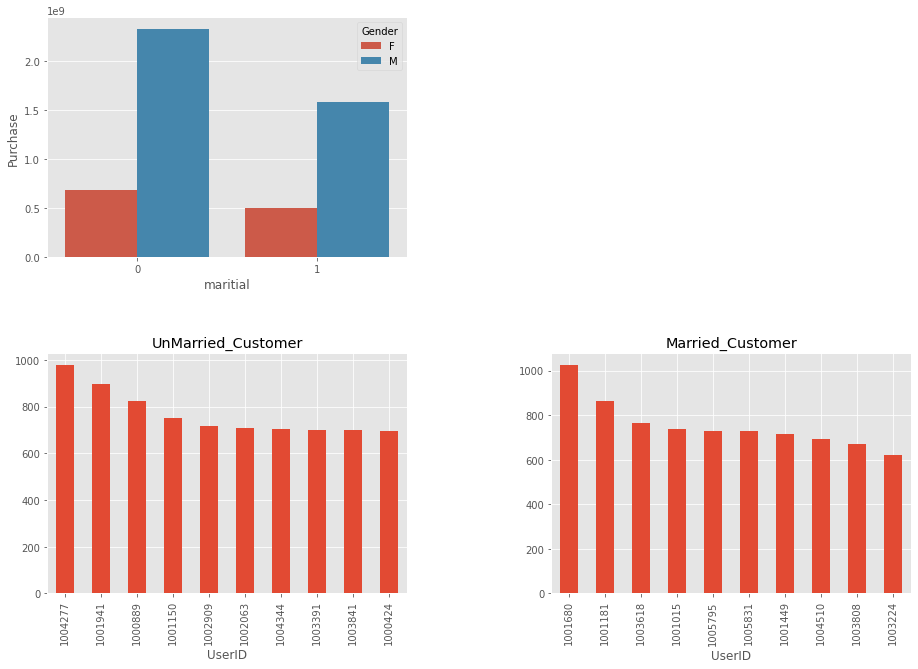

In [67]:
M_UM_P=data.groupby(['Gender','maritial']).agg({'Purchase':sum}).reset_index()
UM=data[data['maritial']==0].value_counts('UserID').nlargest(10)
M=data[data['maritial']==1].value_counts('UserID').nlargest(10)
plt.subplots_adjust(left=1,
                    bottom=1,
                    right=3,
                    top=3,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2,2,1)
sns.barplot(x='maritial',y='Purchase',hue='Gender',data=M_UM_P)
plt.subplot(2,2,3)
UM.plot(x=UM.index,y=UM,kind='bar',title='UnMarried_Customer')
plt.subplot(2,2,4)
M.plot(x=M.index,y=M,kind='bar',title='Married_Customer')
M_UM_P

> In the above plot we can see that 'UnMarried' customers purchasing more than the 'Married' customers.

> And BarPlot showing that top 10 Product Id's purshased by them frequently.

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         550068 non-null  int64  
 1   Gender         550068 non-null  object 
 2   Age            550068 non-null  object 
 3   Occupation     550068 non-null  int64  
 4   City_Category  550068 non-null  object 
 5   city           550068 non-null  int64  
 6   maritial       550068 non-null  int64  
 7   product1       550068 non-null  int64  
 8   product2       550068 non-null  float64
 9   product3       550068 non-null  float64
 10  Purchase       550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


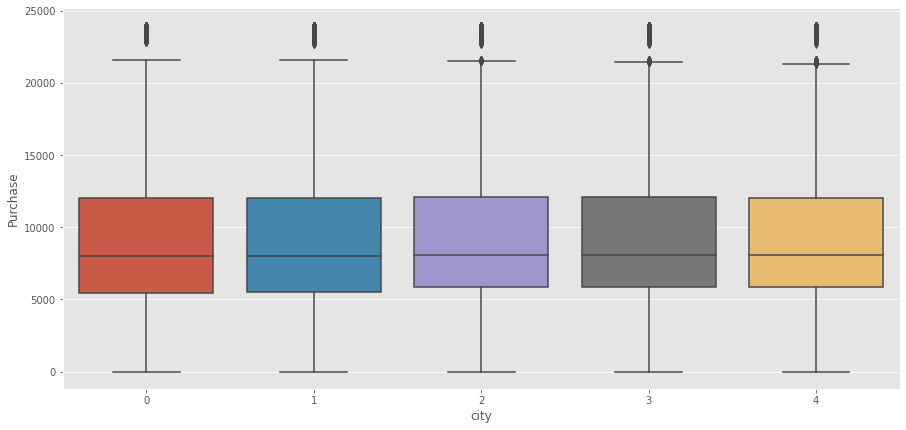

In [69]:
plt.figure(figsize=(15, 7))
sns.boxplot(data = data, x="city", y="Purchase");

> Under Product1 maximum purchase is on 5 followed 1 and 8

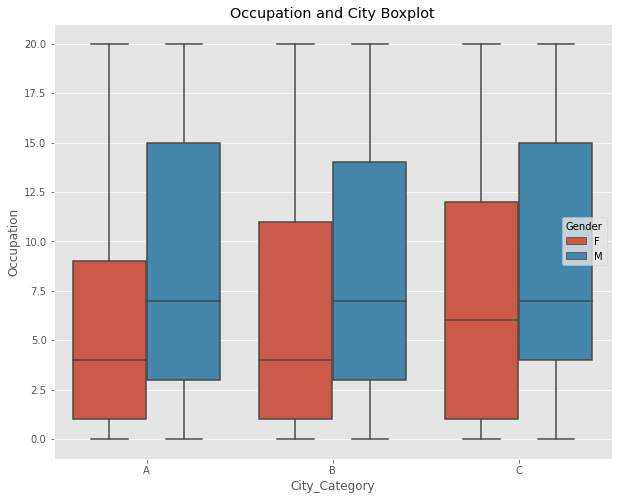

In [70]:
plt.figure(figsize = (10, 8))
sns.boxplot(data = data, x= 'City_Category', y = 'Occupation', hue = 'Gender',
            order = ['A', 'B', 'C'])
plt.title('Occupation and City Boxplot')
plt.show()

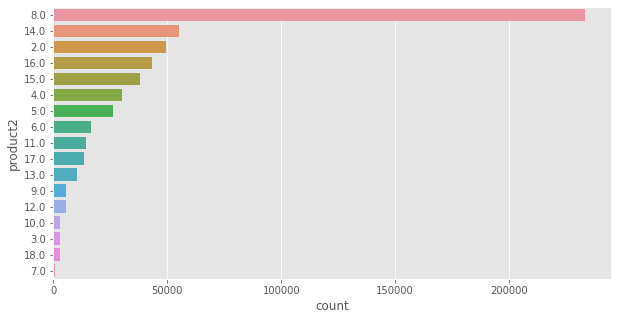

In [71]:
plt.figure(figsize=(10, 5))
sns.countplot(data= data, y="product2", order=data["product2"].value_counts().index);

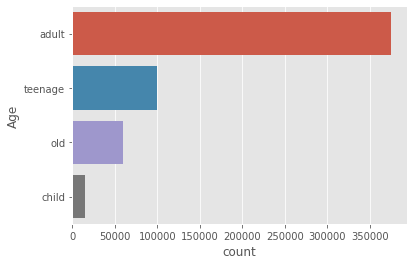

In [72]:
sns.countplot(data=data, y="Age", order=data["Age"].value_counts().index);

* Child category shops least
* Early Adult category shops most
* Shopping tendency is incresing from Child to Teenage to Adult
* Shopping tendency is decresing from Adult to old

## Statistical Analysis

In [73]:
data.describe()

,UserID,Occupation,city,maritial,product1,product2,product3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,1.858418,0.409653,5.404270,9.228379,14.989567,9263.968713
std,1.727592e+03,6.522660,1.289443,0.491770,3.936211,4.318496,2.739846,5023.065394
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,0.000000,1.000000,8.000000,16.000000,5823.000000
50%,1.003077e+06,7.000000,2.000000,0.000000,5.000000,8.000000,16.000000,8047.000000
75%,1.004478e+06,14.000000,3.000000,1.000000,8.000000,14.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [74]:
 data

,UserID,Gender,Age,Occupation,City_Category,city,maritial,product1,product2,product3,Purchase
0,1000001,F,child,10,A,2,0,3,4.0,16.0,8370
1,1000001,F,child,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,child,10,A,2,0,12,4.0,16.0,1422
3,1000001,F,child,10,A,2,0,12,14.0,16.0,1057
4,1000002,M,old,16,C,4,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,M,old,13,B,1,1,20,8.0,16.0,368
550064,1006035,F,adult,1,C,3,0,20,8.0,16.0,371
550065,1006036,F,adult,15,B,4,1,20,8.0,16.0,137
550066,1006038,F,old,1,C,2,0,20,8.0,16.0,365


In [75]:
data["Purchase"].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64>

In [76]:
data["product3"].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0         16.0
1         14.0
2         16.0
3         16.0
4         16.0
          ... 
550063    16.0
550064    16.0
550065    16.0
550066    16.0
550067    16.0
Name: product3, Length: 550068, dtype: float64>

In [77]:
data["city"].mode

<bound method Series.mode of 0         2
1         2
2         2
3         2
4         4
         ..
550063    1
550064    3
550065    4
550066    2
550067    4
Name: city, Length: 550068, dtype: int64>

In [78]:
data["product1"].std

<bound method NDFrame._add_numeric_operations.<locals>.std of 0          3
1          1
2         12
3         12
4          8
          ..
550063    20
550064    20
550065    20
550066    20
550067    20
Name: product1, Length: 550068, dtype: int64>

In [79]:
data["Purchase"].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64>

In [80]:
data["Purchase"].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64>

## Multivariate Analysis

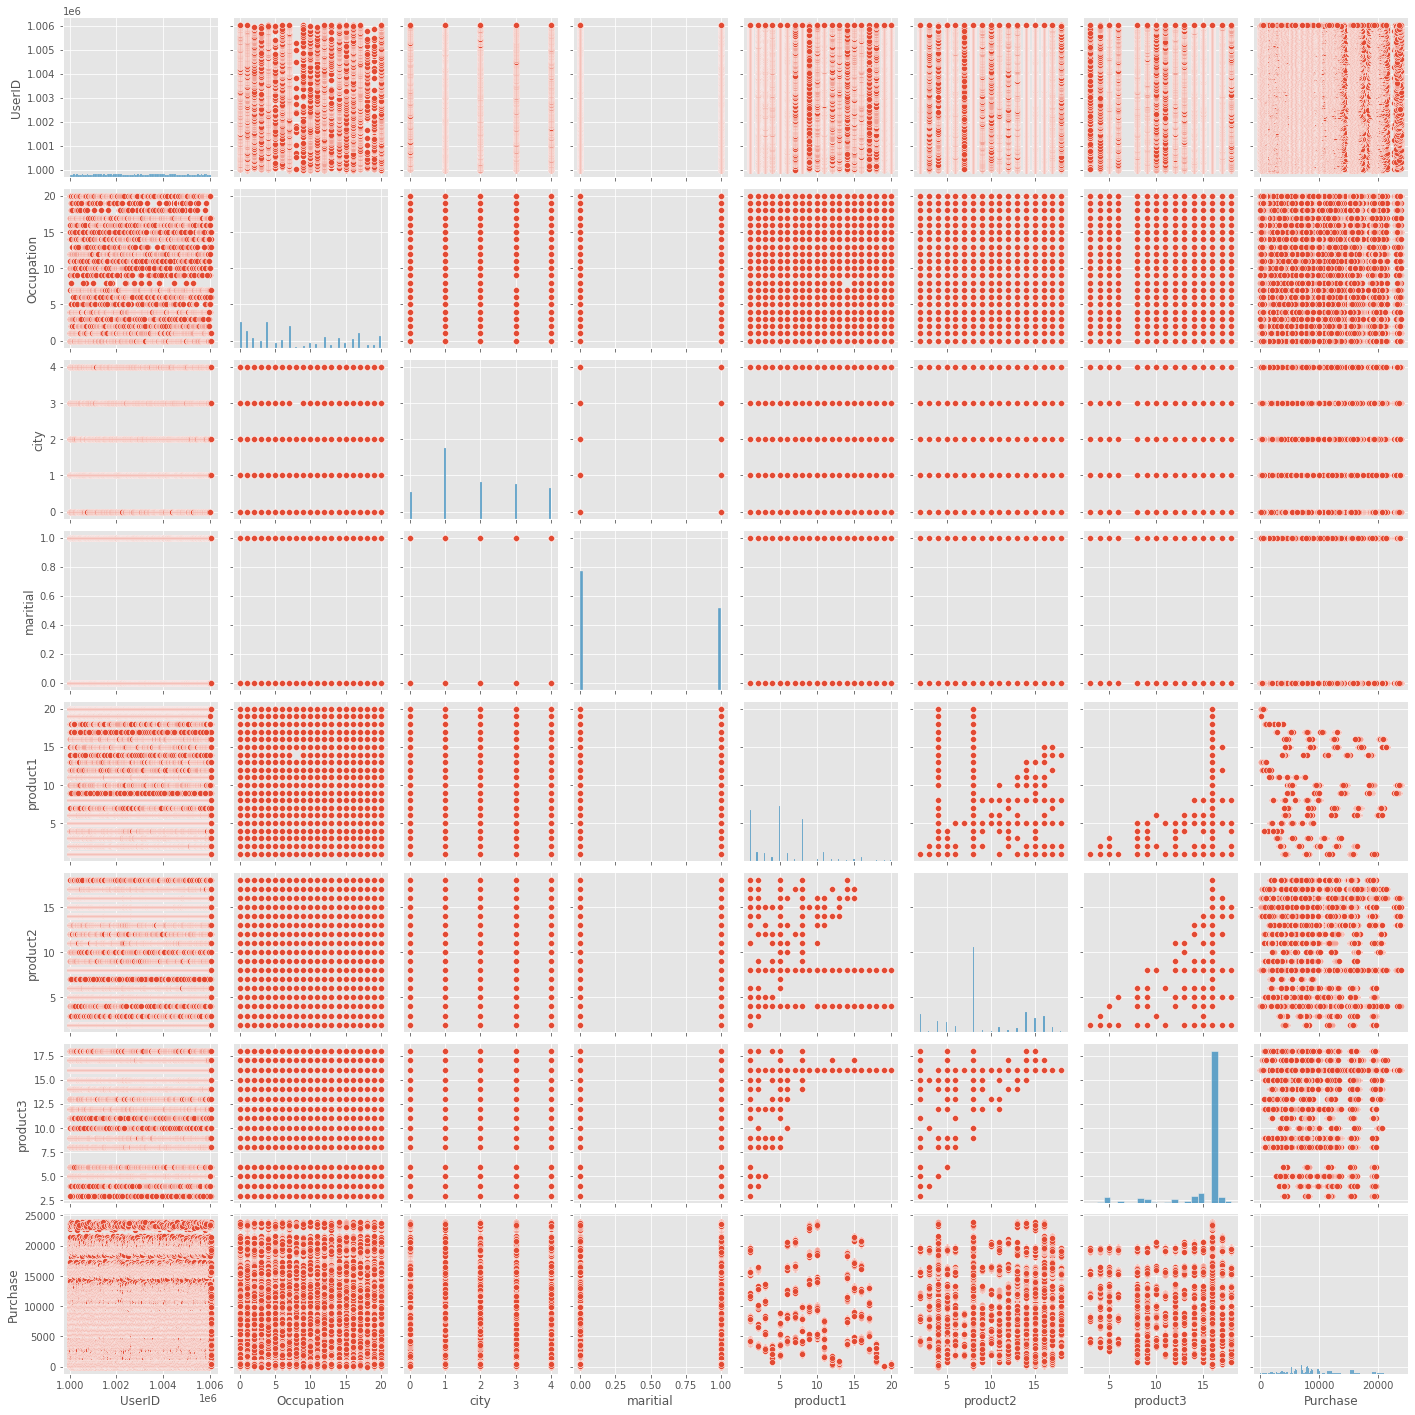

In [81]:
sns.pairplot(data)

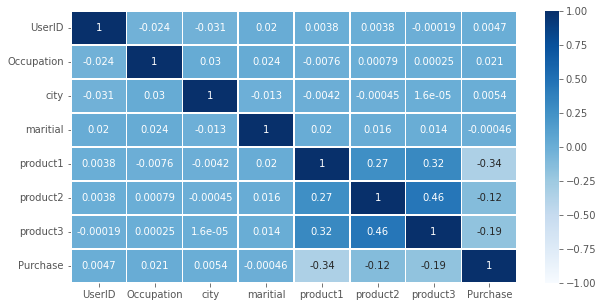

In [82]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), cmap = 'Blues',
            vmin = -1, vmax = 1, linewidth = 0.5,
            annot = True)

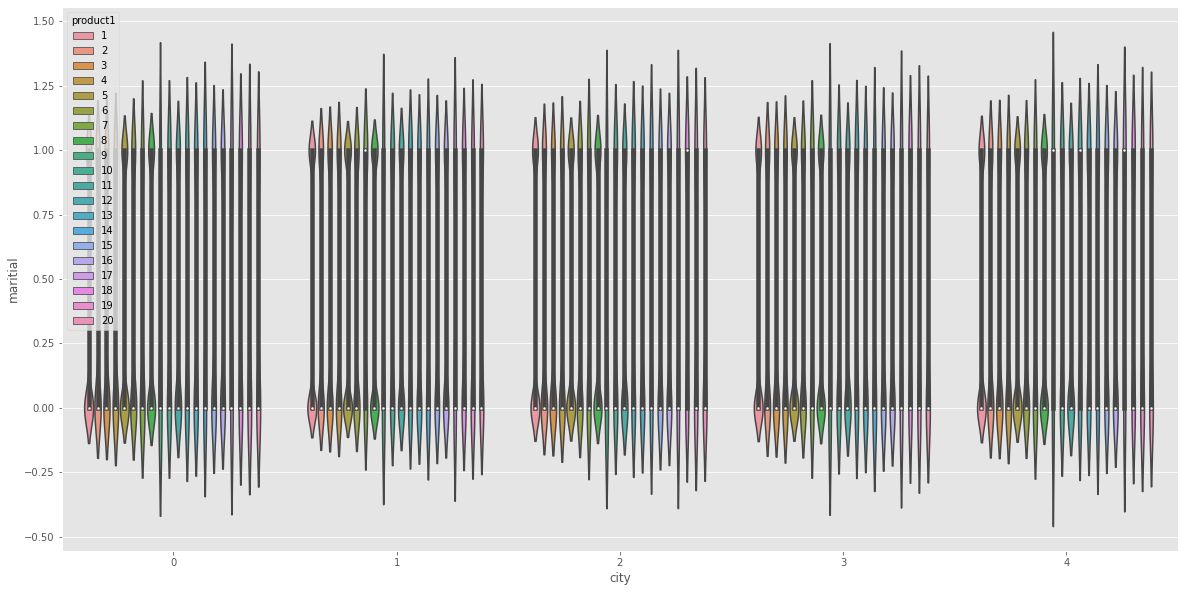

In [87]:
plt.figure(figsize = (20,10))
sns.violinplot(x = 'city', data = data, y ="maritial", hue = "product1" )

# CONCLUSION

> In the Given dataset. I explored and learned many things like,

* How to fill NaN values.

* Where we can use the concept of code reusability.

* In the process of cleaning the dataset I used Pandas and Numpy libraries. Using pandas and numpy I removed unwanted(useless) data and created new data frames and got useful data for my research. After cleaning my data I used Seaborn and Matplotlib libraries to read my data by visualizing it. I created questions regarding my research I tried to solve it by visualizing and applying conditions.

* Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products. By seeing this EDA we can fulfill this requirements.